# Description:Linear regression


Given y = mx+c where m is slope and c is intercept
obj: is to find a best fit line with given x and y values. we can have multiple number of best fit lines but the one which gives minimum error(the distance between predicted values(lie on the line) and true values) is the best fit line.
Objective is to reduce the value of cost function.
cost function = 1/2m * sum(y^ - y)**2

Given x and y vales: if you want to draw a line(y=mx+c),fix c=0 and let m=1..so y = x
x:1,2,3
y:1,2,3
cost function = 1/(2*3) * ((1-1)^2 + (@-2)^2 +(3-3)^2 +(4-4)^2) = 0....for m=1

if m=0.5
cost function = 0.58
Question: At which value of 'm', should I stop the iterations?
    Ans: At the global minimum point where slope=0, from Convergence theorem.
        m = m - (del(m)/der(m)) * alpha(learning rate)
        
To find error: 
    Use RMSE,Absolute error, MSE

# Note: 
    linearity: the relation between X and mean of y is linear
    homoscedacity: error term is same for any value of x(Across all independent values)
    independence: observations are independent on each other.
    normality: y is normally distributed for values of x
Advantage
    Performs well on linear/y separable points
    easy to implement
    can handle overfitting by using dimensional reduction techniques and regularization
Disadvantage
    Do not do well when there is multi-collinearity in features
    Sometimes Lot of Feature Engineering is required
    needs hyper-parameter tuning:lasso and ridge regression

        
    

In [1]:
import numpy as np
import pandas as pd

In [2]:
file = pd.read_csv(r"C:\Users\User\Documents\myProjectC#\MLPrograms\Ecommerce_Customers_new.csv")

In [3]:
file.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021595,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [4]:
file.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [47]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import absolute
from numpy import mean,std
from sklearn.model_selection import GridSearchCV

In [7]:
model = Lasso(alpha=1)

In [10]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [12]:
Y=file['Yearly Amount Spent']
X = file.drop('Yearly Amount Spent',axis=1)

In [13]:
X.shape

(500, 7)

In [14]:
Y.shape

(500,)

In [15]:
X.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership'],
      dtype='object')

In [22]:
X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')

In [23]:
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

In [24]:
#Evaluate the Model
scores = cross_val_score(model,X,Y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)

In [25]:
scores = absolute(scores)

In [26]:
scores

array([7.3713098 , 7.04042033, 7.68784561, 8.14983176, 8.09496478,
       8.44218649, 8.57503339, 9.87165151, 8.36421474, 7.36665262,
       8.33927389, 9.04820412, 8.4304369 , 8.37888576, 7.81570089,
       8.00522738, 7.00755272, 8.26608467, 8.54956931, 7.03982418,
       7.64136172, 7.69582792, 8.1128229 , 9.0567388 , 7.18968235,
       7.86191606, 7.96434893, 7.95355607, 9.26819956, 7.9541431 ])

In [32]:
print('mean absolute error:{}, std os scores:{})'.format(mean(scores), std(scores)))

mean absolute error:8.084782275480721, std os scores:0.6655537712265317)


In [ ]:
# we can apply Lasso regression as our final model and make predictions on new data.

# fit the model

In [35]:
from sklearn.model_selection import train_test_split


In [36]:
x_train, x_test, y_train,y_test = train_test_split(X,Y, test_size=0.4, random_state=10)

In [37]:
model = Lasso(alpha=1)

In [38]:
model.fit(x_train,y_train)

Lasso(alpha=1)

In [39]:
y_hat = model.predict(x_test)

# tuning alpha value:

In [41]:
model_mod = Lasso()

In [42]:
cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

In [45]:
grid = dict()
grid['alpha'] = np.arange(0,1,0.01)

In [48]:
search = GridSearchCV(model_mod, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [50]:
results = search.fit(x_train, y_train)

C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.484e+04, tolerance: 1.571e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fa

In [52]:
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -8.022
Config: {'alpha': 0.0}


In [ ]:
#Ignore the sign; the library makes the MAE negative for optimization purposes
#In this case, we can see that we achieved slightly better results than the default 8.084 vs. 8.022. 

In [ ]:
#ridge regression

In [53]:
from sklearn.linear_model import Ridge

In [54]:
clf = Ridge(alpha=1.0)

In [55]:
clf.fit(x_train,y_train)

Ridge()

In [56]:
clf.predict(x_test)

array([684.07373104, 497.46341258, 598.80311088, 609.28464876,
       584.32059103, 478.00206233, 543.36221515, 574.79755183,
       750.4632944 , 468.66095396, 506.15682795, 558.24284351,
       552.87991852, 493.7137002 , 530.36970708, 434.25946595,
       542.82098598, 561.89376434, 421.71679927, 408.63226031,
       543.70272765, 450.8404929 , 499.68170122, 507.15340774,
       692.23548587, 435.08636404, 527.03499609, 466.13997849,
       493.53285328, 477.8881578 , 562.74038497, 487.07762372,
       481.23821873, 507.91880614, 514.90710434, 538.47307291,
       422.09703179, 471.80817145, 510.2625895 , 507.18818696,
       503.03321623, 551.67049208, 640.83179943, 434.17435835,
       702.80594962, 606.18061388, 656.88745024, 765.02213093,
       576.5395055 , 445.45898012, 473.81935696, 504.01090823,
       600.91834871, 490.81871763, 551.65934193, 489.28465009,
       430.16002487, 558.11560337, 431.77323944, 556.27073215,
       401.97919003, 421.44782289, 546.07363088, 564.14

In [ ]:
COMPLETE IT..

In [10]:
file.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

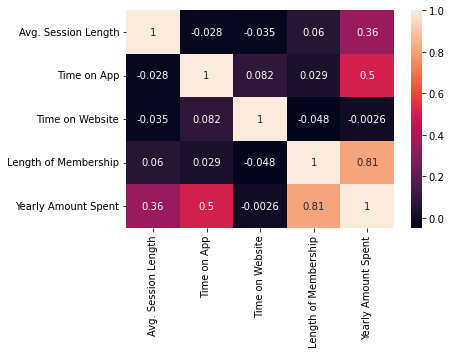

In [11]:
import seaborn as sns
sns.heatmap(file.corr(), annot=True)

In [12]:
file.isnull().any()

Email                   False
Address                 False
Avatar                  False
Avg. Session Length     False
Time on App             False
Time on Website         False
Length of Membership    False
Yearly Amount Spent     False
dtype: bool

In [13]:
X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')

In [14]:
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [17]:

x_train, x_test, y_train,y_test = train_test_split(X,Y, test_size=0.4, random_state=10)

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(x_train,y_train)

LinearRegression()

In [20]:
prediction = lm.predict(x_test)

Text(0, 0.5, 'prediction')

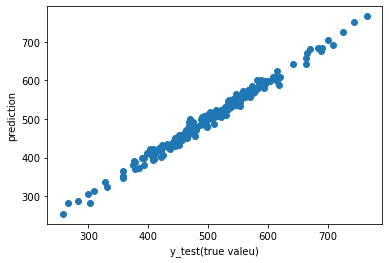

In [21]:
import matplotlib.pylab as plt
plt.scatter(y_test,prediction)
plt.xlabel('y_test(true valeu)')
plt.ylabel('prediction')

# Evaluating the performance of the model

We will be using Root mean squared error(RMSE) and Coefficient of Determination(R² score) to evaluate our model.
#Residuals
The line for which the the error between the predicted values and the observed values is minimum is called the best
fit line or the regression line. These errors are also called as residuals.
#RMSE
RMSE is the square root of the average of the sum of the squares of residuals.

R² score or the coefficient of determination explains how much the total variance of the dependent variable can be reduced by using the least square regression.



In [70]:
#sum of square of Residuals
ssr = np.sum((prediction-y_test)**2)
#  total sum of squares
sst = np.sum((y_test-np.mean(y_test))**2)
#R2 score
r2_score = 1-(ssr/sst)
print(r2_score)

0.9874089129523683


In [ ]:
Now, we have to compare the y_prediction values with the original values because we have to calculate the accuracy of our model,
which was implemented by a concept called r2_score.

In [66]:
from sklearn.metrics import r2_score
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=prediction)))

R squared: 0.9874089129523683


In [ ]:
Homoscedasticity: Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is
    the same across all values of the independent variables

# evaluate matrix
from sklearn import metrics


In [35]:
print('MAE', metrics.mean_absolute_error(y_test, prediction))

MAE 7.918349539335306


# Improve the performance of linear model

# Goldfeld Quandt Test
Linear regression assumes that the variance between data points does not increase or
decrease as a function of the dependent variable

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

The Goldfeld Quandt Test is a test used in regression analysis to test for homoscedasticity. It compares variances of two subgroups; one set of high values and one set of low values. If the variances differ, the test rejects the null hypothesis 
that the variances of the errors are not constant. 

Goldfeld and Quandt dscribed 2 types of tests: parametric and non parametric.
The term “Quandt Goldfeld test” always means parametric test and the assumprtion for the test is data are normally distributed.



Detecting heteroscedasticity!
Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^).
If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.


The coefficient of determination is defined as
, where is the residual sum of squares ((y_true - y_pred)** 2).sum() and is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). 

In [37]:
residuals = y_test.values-prediction
#print(residuals)

C:\Users\User\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


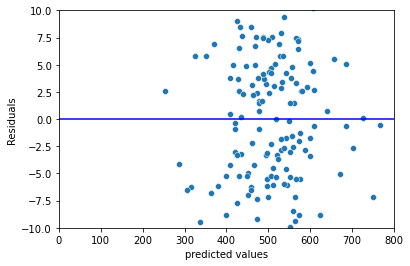

In [96]:
sns.scatterplot(prediction,residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,800)
p = sns.lineplot([0,800],[0,0],color='blue')


In [102]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.diagnostic import het_breuschpagan

In [107]:
test = sms.het_goldfeldquandt(residuals, x_test)

In [109]:
name = ['F statistics','p-value']
lzip(name,test)

[('F statistics', 1.5293328835210276), ('p-value', 0.01931428127727452)]

# Correlation
#What is p-value and how to choose features depending on p-value

Correlation refers to how close two variables are to having a linear relationship with each other. Features with high correlation values
are more linearly dependent. So when two features have high correlation, we can drop one of the two features. p-value can be used to
decide whether whether to keep a feature or not.
Null hypothesis: there is no realtionship between your variables
Alternative hypothesis: there exists relation between your variables.
    
i). if p-value < 0.05 then reject Null hypothesis.(implies correlation between features)
ii). if p-value > 0.05 then Alternative hypothesis is weak and could not reject Null hypothesys

No Hetroskadacity (constant variance)

Goldfeld Quandt Test:

    Null Hypothesis: Error terms are homoscedastic(same finite variance)
    Alternative Hypothesis: Error terms are heteroscedastic.


In [ ]:
#p-value: 0.01931(p<0.05) implies accept Alternative hypothesis i.e error terms are heteroscedastic( Variances changes with dependent variable)
which violates the theory that .....
Linear regression assumes that the variance between data points does not increase or decrease as a function of the dependent variable.

In [ ]:
#In this case Standard error of the linear model is not reliable.

In [ ]:
#step-2: Find no Multi-Colinearity
Consider a problem statement where one asked to predict the cost of real-estate property, based on the length of the plot,facilities, and proximity to schools.
Here two independent variables length and area plot are directly related. As the length increases, the area also increases. Such correlation affects the model performance.
How to identify this?


<AxesSubplot:>

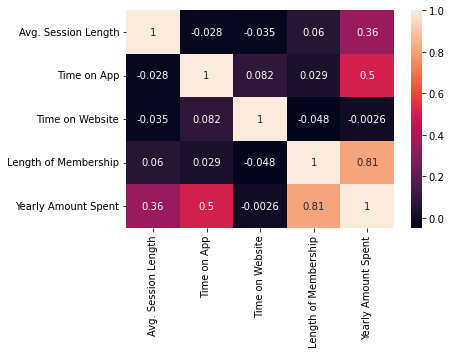

In [22]:
import seaborn as sns
sns.heatmap(file.corr(), annot=True)

In [24]:
corr_matrix = file.corr().abs()
print(corr_matrix)

                      Avg. Session Length  Time on App  Time on Website  \
Avg. Session Length              1.000000     0.027826         0.034987   
Time on App                      0.027826     1.000000         0.082388   
Time on Website                  0.034987     0.082388         1.000000   
Length of Membership             0.060247     0.029143         0.047582   
Yearly Amount Spent              0.355088     0.499328         0.002641   

                      Length of Membership  Yearly Amount Spent  
Avg. Session Length               0.060247             0.355088  
Time on App                       0.029143             0.499328  
Time on Website                   0.047582             0.002641  
Length of Membership              1.000000             0.809084  
Yearly Amount Spent               0.809084             1.000000  


# Creating the Correlation matrix and Selecting the Upper trigular matrix

Note that Correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1. 
So, It does not matter that we select the upper triangular or lower triangular part of the correlation matrix but we should not include the diagonal elements.
So we are selecting the upper traingular. 

In [32]:
upper_tri=corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

C:\Users\User\AppData\Local\Temp/ipykernel_15140/3014317124.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri=corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


# Dropping the column with high Correlation

So we are selecting the columns which are having absolute correlation greater than 0.95 and making a list of those columns named 'to_drop'. 

In [33]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

In [34]:
print(to_drop)
# Result shows, there is no column to drop as the result returns an empty list.

[]


Check if there are any columns whose correlation values > 0.95, if there are any then drop those columns and drop from the dataframe also.
df1 = df.drop(df.columns[to_drop], axis=1)

# Step-3 Normality distribution
It is important that continuous variables in the dataset need to be Gaussian distributed.
#Gaussian distribution
Gaussian distribution It is a probability distribution that is symmetric about the mean, 
showing that data near the mean are more frequent in occurrence than data far from the mean.

In [35]:
from scipy.stats import norm, skew

C:\Users\User\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normality of error terms/residuals')

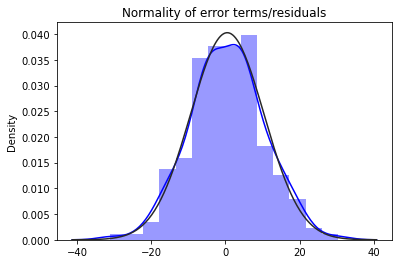

In [39]:
sns.distplot(residuals, fit = norm, kde = True, color = 'blue')
plt.title("Normality of error terms/residuals")

The residual terms are pretty much normally distributed for the number of test points we took.
Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal. 

# step-4 Autocorrelation